In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#from xgboost.sklearn import XGBClassifier


**Titanic dataset description**

* PassengerId -- A numerical id assigned to each passenger
* Survived -- Whether the passenger survived (1), or didn't (0). Column for prediction
* Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3)
* Name -- the name of the passenger
* Sex -- The gender of the passenger -- male or female
* Age -- The age of the passenger. Fractional
* SibSp -- The number of siblings and spouses the passenger had on board
* Parch -- The number of parents and children the passenger had on board
* Ticket -- The ticket number of the passenger
* Fare -- How much the passenger paid for the ticket
* Cabin -- Which cabin the passenger was in
* Embarked -- Where the passenger boarded the Titanic

### Load the data


In [3]:
train_data = pd.read_csv('./data/titanic/train.csv')
test_data = pd.read_csv('./data/titanic/test.csv')
print(train_data.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


### I. Explore the data and get insights

===== survived by class and sex
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64
===== train: males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000

              Age        Fare      Pclass       SibSp       Parch
count  127.000000  152.000000  152.000000  152.000000  152.000000
mean    30.272362   49.747699    2.144737    0.565789    0.598684
std     15.428613   73.108716    0.887051    0.974313    1.105434
min      0.170000    6.950000    1.000000    0.000000    0.000000
25%     20.500000    8.626050    1.000000    0.000000    0.000000
50%     27.000000   21.512500    2.000000    0.000000    0.000000
75%     38.500000   55.441700    3.000000    1.000000    1.000000
max     76.000000  512.329200    3.000000    8.000000    9.000000
female    233
male      109
Name: Sex, dtype: int64
Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %
Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


Text(0.5, 1.0, 'Survival by Embarked/Fare')

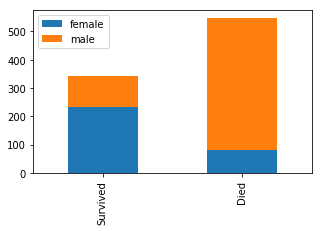

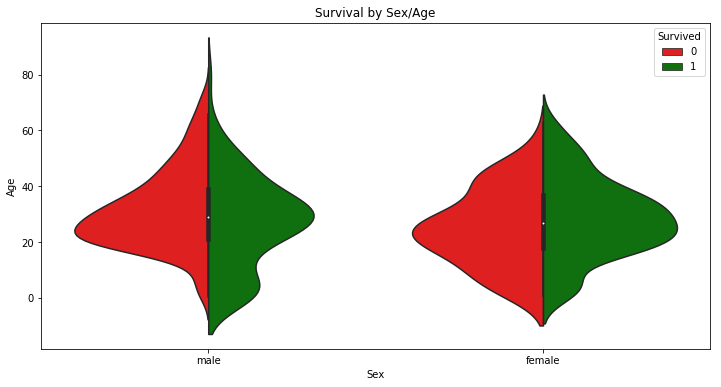

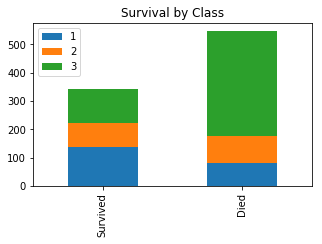

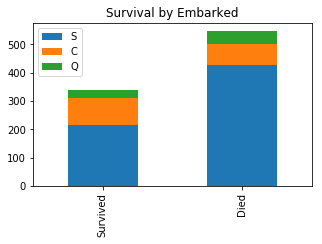

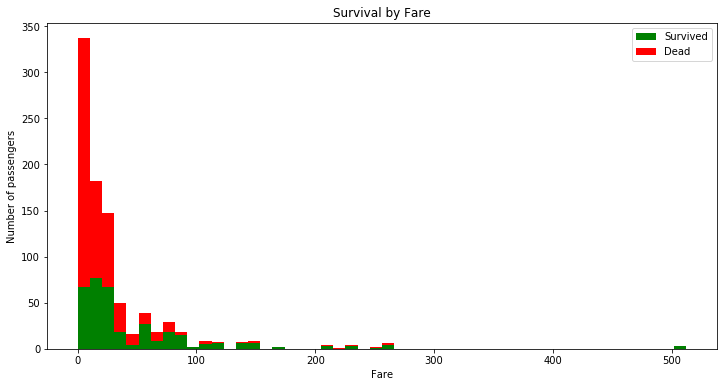

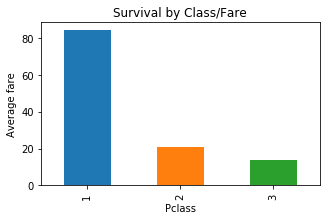

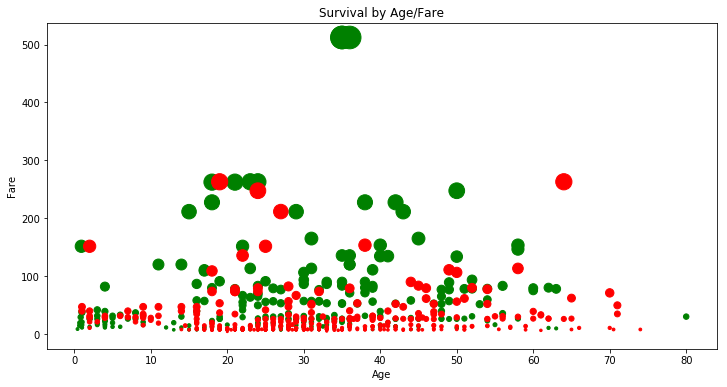

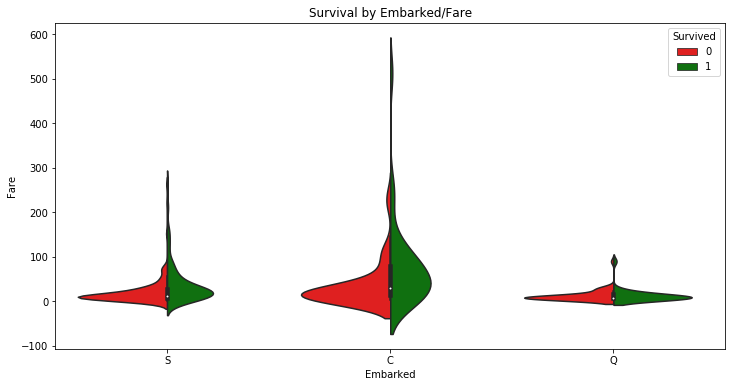

In [51]:
print("===== survived by class and sex")
print(train_data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))
describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
print("===== train: males")
print(train_data[train_data["Sex"] == "male"][describe_fields].describe())
print("===== test: males")
print(test_data[test_data["Sex"] == "male"][describe_fields].describe())
print("===== train: females")
print(train_data[train_data["Sex"] == "female"][describe_fields].describe())
print("===== test: females")
print(test_data[test_data["Sex"] == "female"][describe_fields].describe())
# -------------------Survived/Died by Sex------------------------------------
Survived = train_data[train_data.Survived == 1]['Sex'].value_counts()
print(Survived)
Died = train_data[train_data.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived, Died])
df_sex.index = ['Survived', 'Died']
df_sex.plot(kind='bar', stacked=True, figsize=(5, 3))
# train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
# train_data['Died'] = 1 - train_data['Survived']
# train_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(12, 6), stacked=True, colors=['g', 'r'])
female_survived = df_sex.female[0] / df_sex.female.sum() * 100
male_survived = df_sex.male[0] / df_sex.male.sum() * 100
print("Percentage of female that survived:", round(female_survived), "%")
print("Percentage of male that survived:", round(male_survived), "%")
# -------------------Survived/Died by Sex/Age -------------------------------------
fig = plt.figure(figsize=(12, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"})
plt.title("Survival by Sex/Age")
# -------------------Survived/Died by Class -------------------------------------
survived_class = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
dead_class = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class, dead_class])
df_class.index = ['Survived', 'Died']
df_class.plot(kind='bar', stacked=True, figsize=(5, 3), title="Survival by Class")
Class1_survived = df_class.iloc[0, 0] / df_class.iloc[:, 0].sum() * 100
Class2_survived = df_class.iloc[0, 1] / df_class.iloc[:, 1].sum() * 100
Class3_survived = df_class.iloc[0, 2] / df_class.iloc[:, 2].sum() * 100
print("Percentage of Class 1 that survived:", round(Class1_survived), "%")
print("Percentage of Class 2 that survived:", round(Class2_survived), "%")
print("Percentage of Class 3 that survived:", round(Class3_survived), "%")
# -------------------- Survived/Died by Embarked ----------------------------
survived_embark = train_data[train_data['Survived'] == 1]['Embarked'].value_counts()
dead_embark = train_data[train_data['Survived'] == 0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark, dead_embark])
df_embark.index = ['Survived', 'Died']
df_embark.plot(kind='bar', stacked=True, figsize=(5, 3), title="Survival by Embarked")
Embark_S = df_embark.iloc[0, 0] / df_embark.iloc[:, 0].sum() * 100
Embark_C = df_embark.iloc[0, 1] / df_embark.iloc[:, 1].sum() * 100
Embark_Q = df_embark.iloc[0, 2] / df_embark.iloc[:, 2].sum() * 100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:", round(Embark_C), "%")
print("Percentage of Embark Q that survived:", round(Embark_Q), "%")
# -------------------- Survived/Died by Fare ----------------------------
figure = plt.figure(figsize=(12, 6))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, color=['g', 'r'], bins=50, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title("Survival by Fare")
plt.legend()
# -------------------- Survived/Died by Class/Fare ----------------------------
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_ylabel('Average fare')
train_data.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax=ax, title="Survival by Class/Fare")
# -------------------- Survived/Died by Age/Fare ----------------------------
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], 
           c='green', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], 
           c='red', s=train_data[train_data['Survived'] == 0]['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Survival by Age/Fare")
# -------------------- Survived/Died by Embarked/Fare ----------------------------
fig = plt.figure(figsize=(12, 6))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"})
plt.title("Survival by Embarked/Fare")


### II. Feature engineering
Data preprocessing would include:
* Extracting passenger titles
* Filling missing values
* Encoding categorical data
* Normalization (scaling) of numeric predictors (some classifiers are scale sensitive)

In [4]:
y = train_data['Survived']
train_data.drop(['Survived'], axis=1, inplace=True)
print(train_data.head(2))

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   

      Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0    male  22.0      1      0  A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0   PC 17599  71.2833   C85        C  


Columns with N/A values: ['Age', 'Fare', 'Cabin', 'Embarked']


Prepared dataset:
   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Pclass_1  Pclass_2  \
0       3    1  22.0      1      0   7.2500      0         0         0   
1       1    0  38.0      1      0  71.2833      3         1         0   

   Title_Capt.     ...      Cabin_1  Cabin_2  Cabin_3  Cabin_4  Cabin_5  \
0            0     ...            0        0        0        0        0   
1            0     ...            0        0        1        0        0   

   Cabin_6  Cabin_7  Cabin_8  Embarked_C  Embarked_Q  
0        0        0        0           0           0  
1        0        0        0           1           0  

[2 rows x 37 columns]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


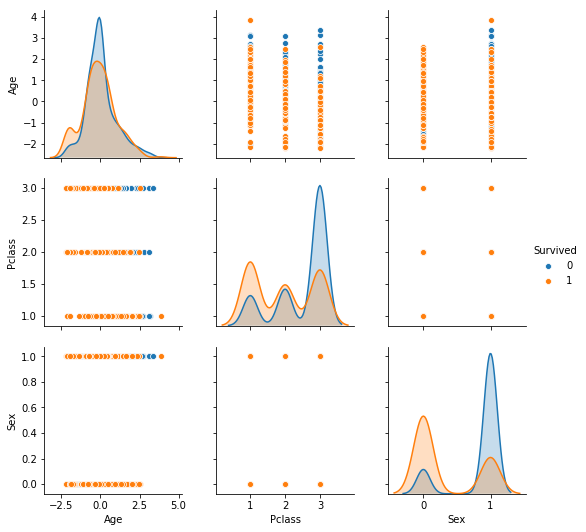

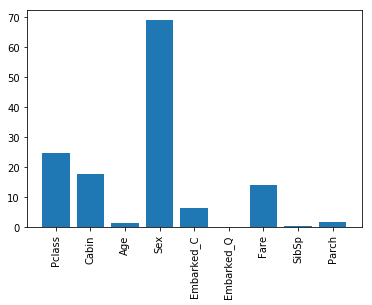

In [5]:
def get_columns_with_missing_data(dataset):
    columns_with_null = []
    for column in dataset:
        if sum(dataset[column].isnull()) > 0:
            columns_with_null.append(column)
    return columns_with_null


def create_title_column_from_name(dataset):
    secondPart = dataset['Name'].str.split(',').str[1]
    return pd.DataFrame(secondPart).Name.str.split('\s+').str[1]


def prepare_age(dataset):
    age_median_by_name = dataset.groupby('Title')['Age'].median()
    return dataset.apply(lambda row: age_median_by_name[row['Title']] if np.isnan(row['Age']) else row['Age'], axis=1)


all_data = pd.concat([train_data, test_data], sort=False, ignore_index=True)
all_data.drop(['PassengerId'], axis=1, inplace=True)
print("Columns with N/A values:", get_columns_with_missing_data(all_data))

# ----------------- Prepare Pclass ------------------------
dummy_pclass = pd.get_dummies(all_data['Pclass'], prefix='Pclass')
all_data = pd.concat([all_data, dummy_pclass], axis=1, sort=False)
# after generating dummy values we can delete original column and one of generated, 
# i.e. Pclass_1 is 0, Pclass_2 is 0 then we know what value of Pclass_3
columns_to_drop = ['Pclass_3']

# ----------------- Prepare Name --------------------------
all_data['Title'] = create_title_column_from_name(all_data)
dummy_title = pd.get_dummies(all_data['Title'], prefix='Title')
all_data = pd.concat([all_data, dummy_title], axis=1, sort=False)
columns_to_drop.append('Name')
columns_to_drop.append('Title')

# ----------------- Prepare Sex ---------------------------
genders = {"male": 1, "female": 0}
all_data['Sex'] = all_data['Sex'].map(genders)

# ----------------- Prepare Age ---------------------------
all_data['Age'] = prepare_age(all_data)

# ----------------- Prepare SibSp -------------------------
# ----------------- Prepare Parch -------------------------
# ----------------- Prepare Ticket ------------------------
columns_to_drop.append('Ticket')

# ----------------- Prepare Fare --------------------------
fare_median_by_class = all_data.groupby('Pclass')['Fare'].median()
all_data["Fare"] = all_data.apply(lambda row: fare_median_by_class[row["Pclass"]]
if pd.isnull(row["Fare"]) else row["Fare"], axis=1)

# ----------------- Prepare Cabin -------------------------
all_data.loc[all_data['Cabin'].isnull(), 'Cabin'] = "U"
cabins_dict = {"U": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
all_data["Cabin"] = all_data["Cabin"].fillna("U").apply(lambda cabin: cabins_dict.get(cabin[0], -1))
dummy_cabin = pd.get_dummies(all_data['Cabin'], prefix='Cabin')
all_data = pd.concat([all_data, dummy_cabin], axis=1, sort=False)
# columns_to_drop.append('Cabin')
columns_to_drop.append('Cabin_0')

# ----------------- Prepare Embarked ----------------------
all_data.loc[all_data['Embarked'].isnull(), 'Embarked'] = 'S'
dummy_embarked = pd.get_dummies(all_data['Embarked'], prefix='Embarked')
all_data = pd.concat([all_data, dummy_embarked], axis=1, sort=False)
columns_to_drop.append('Embarked')
columns_to_drop.append('Embarked_S')
all_data.drop(columns_to_drop, axis=1, inplace=True)
print("Prepared dataset:")
print(all_data.head(2))

# Normalize numeric predictors 
predictors_to_normalize = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
scaler.fit(all_data[predictors_to_normalize])
all_data[predictors_to_normalize] = scaler.transform(all_data[predictors_to_normalize])

# select predictors for training (comment unnecessary)
predictors = ["Pclass",
              #"Name",
              #"Title",
              #"Cabin",
              #"Ticket",
              "Cabin",
              "Age",
              "Sex",
              "Embarked_C", "Embarked_Q",
              "Fare",
              "SibSp", "Parch"]
train = all_data.head(train_data.shape[0]).copy()
train['Survived'] = y
test = all_data.tail(test_data.shape[0]).copy()
g = sns.pairplot(train, vars=["Age", "Pclass", "Sex"], hue='Survived')
plt.show()

# Estimate the importance of the predictors
selector = SelectKBest(f_classif, k=5)
selector.fit(train[predictors], y)
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()
train.drop(['Cabin', 'Pclass', 'Survived'], axis=1, inplace=True)
test.drop(['Cabin', 'Pclass'], axis=1, inplace=True)


### III. Classification 

In [6]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

clf_neighbors = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf_neighbors, train, y, cv=cv, n_jobs=-1)
print("Accuracy (k-neighbors): {}/{}".format(scores.mean(), scores.std()))

clf_sgd = SGDClassifier(random_state=1)
scores = cross_val_score(clf_sgd, train, y, cv=cv, n_jobs=-1)
print("Accuracy (sgd): {}/{}".format(scores.mean(), scores.std()))

clf_svm = SVC(C=1.0)
scores = cross_val_score(clf_svm, train, y, cv=cv, n_jobs=-1)
print("Accuracy (svm): {}/{}".format(scores.mean(), scores.std()))

clf_naivebayes = GaussianNB()
scores = cross_val_score(clf_naivebayes, train, y, cv=cv, n_jobs=-1)
print("Accuracy (naive bayes): {}/{}".format(scores.mean(), scores.std()))


def linear_scorer(estimator, x, y):
    scorer_predictions = estimator.predict(x)
    scorer_predictions[scorer_predictions > 0.5] = 1
    scorer_predictions[scorer_predictions <= 0.5] = 0
    return accuracy_score(y, scorer_predictions)


clf_linear = LinearRegression()
scores = cross_val_score(clf_linear, train, y, cv=cv, n_jobs=-1, scoring=linear_scorer)
print("Accuracy (linear regression): {}/{}".format(scores.mean(), scores.std()))

clf_log = LogisticRegression(random_state=1)
scores = cross_val_score(clf_log, train, y, cv=cv, n_jobs=-1, scoring=linear_scorer)
print("Accuracy (logistic regression): {}/{}".format(scores.mean(), scores.std()))

clf_forest = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
scores = cross_val_score(clf_forest, train, y, cv=cv, n_jobs=-1)
print("Accuracy (random forest): {}/{}".format(scores.mean(), scores.std()))


Accuracy (k-neighbors): 0.8069584736251403/0.017674540682405867


Accuracy (sgd): 0.7418630751964085/0.054035479763011096
Accuracy (svm): 0.8305274971941637/0.0069185342345330515
Accuracy (naive bayes): 0.5757575757575758/0.13301439026776393


Accuracy (linear regression): 0.8350168350168351/0.007273558584071673
Accuracy (logistic regression): 0.8350168350168351/0.007273558584071691


Accuracy (random forest): 0.8316498316498316/0.007273558584071691


### IV. Optimize prediction

In [8]:
random_forest = RandomForestClassifier(random_state=1)
random_forest_params = [{
    "n_estimators": [350, 400, 450],
    "min_samples_split": [6, 8, 10],
    "min_samples_leaf": [1, 2, 4]
}]
clf_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
clf_forest_grid.fit(train, y)
alg_forest_best = clf_forest_grid.best_estimator_
print("Accuracy (random forest auto): "
      "{} with params {}".format(clf_forest_grid.best_score_, clf_forest_grid.best_params_))

# clf_xgb = XGBClassifier()
# clf_xgb_params = [
#     {"n_estimators": [230, 250, 270],
#      "max_depth": [1, 2, 4],
#      "learning_rate": [0.01, 0.02, 0.05]}
# ]
# clf_xgb_grid = GridSearchCV(clf_xgb, clf_xgb_params, cv=cv, refit=True, verbose=1, n_jobs=1)
# clf_xgb_grid.fit(train, y)
# clf_xgb_best = clf_xgb_grid.best_estimator_
# print("Accuracy (xgboost auto): "
#       "{} with params {}".format(clf_xgb_grid.best_score_, clf_xgb_grid.best_params_))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.1s


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   44.6s finished


Accuracy (random forest auto): 0.8361391694725028 with params {'n_estimators': 450, 'min_samples_split': 8, 'min_samples_leaf': 1}


### V. Submit the prediction

In [10]:
clf = clf_log #alg_frst_best
clf.fit(train, y)
predictions = clf.predict(test)
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("./data/titanic/titanic-submission.csv", index=False)